In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

In [2]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/kaggle/input/dmscoba/train',
    val = '/kaggle/input/dmscoba/valid',
    test = '/kaggle/input/dmscoba/test',
    nc = 5,
    names = ['bottle', 'cigarette', 'phone', 'smoke', 'vape']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [5]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/kaggle/tmp/yolov5


In [11]:
!wandb disabled
!python train.py --img 640 --batch 128 --epochs 20 --data /kaggle/tmp/yolov5/data/../data.yaml --weights yolov5s.pt 

/bin/bash: wandb: command not found
2024-05-27 05:59:28.269208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 05:59:28.269276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 05:59:28.271487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/kaggle/tmp/yolov5/data/../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_we

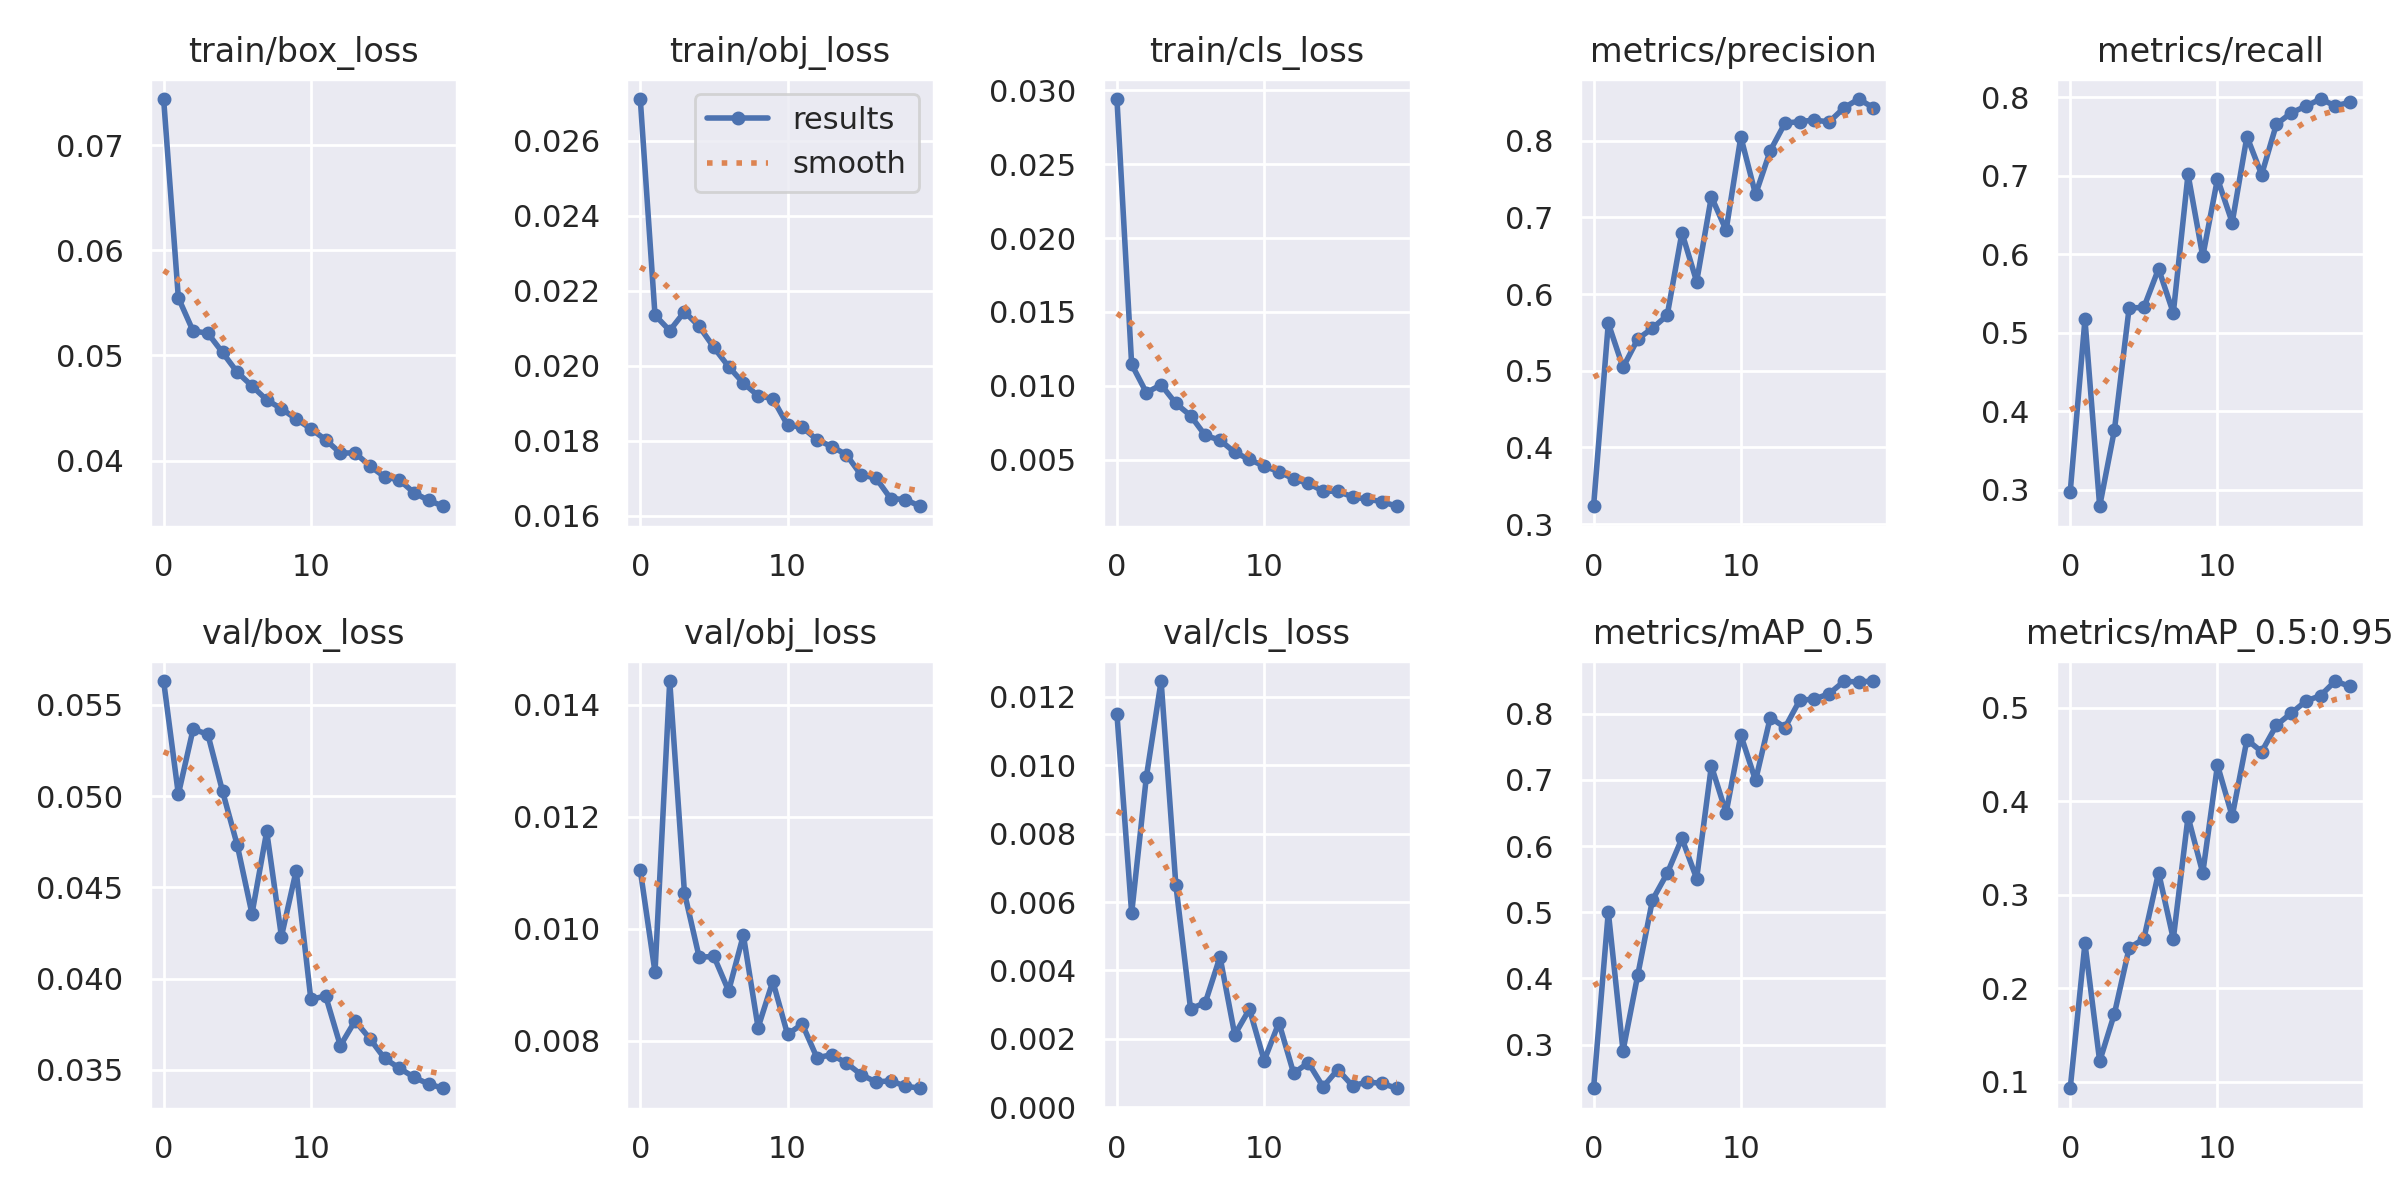

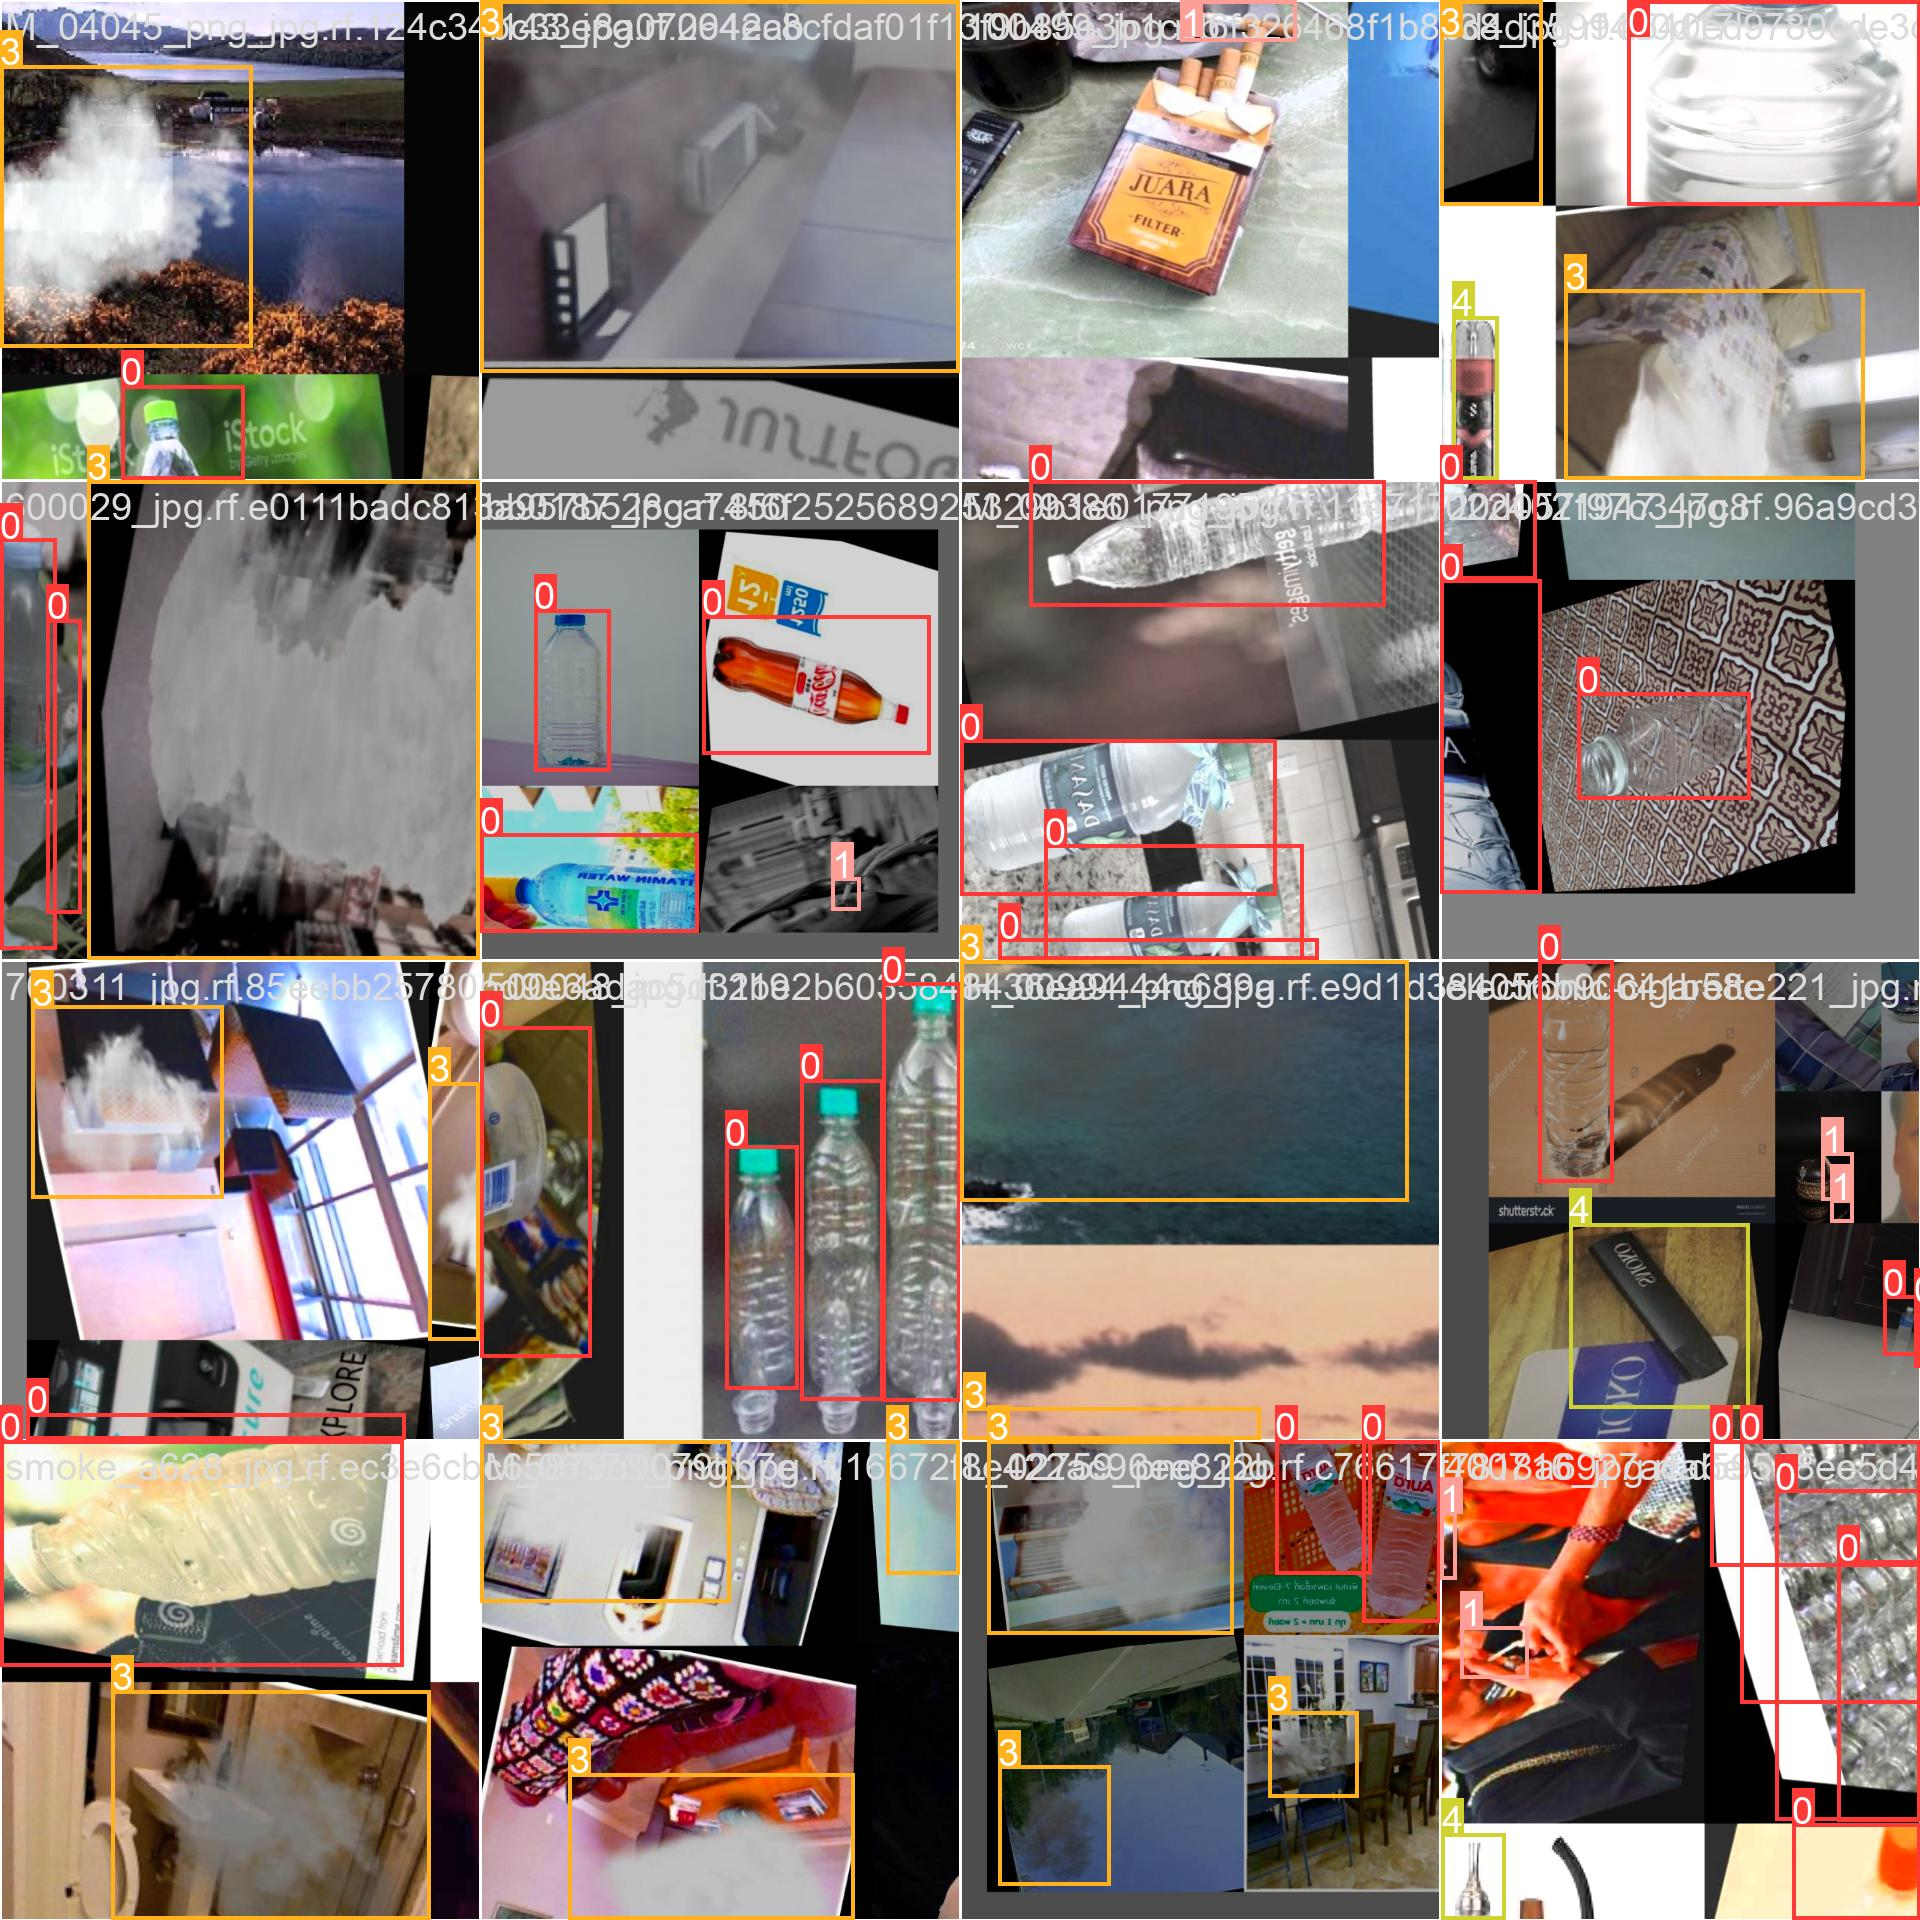

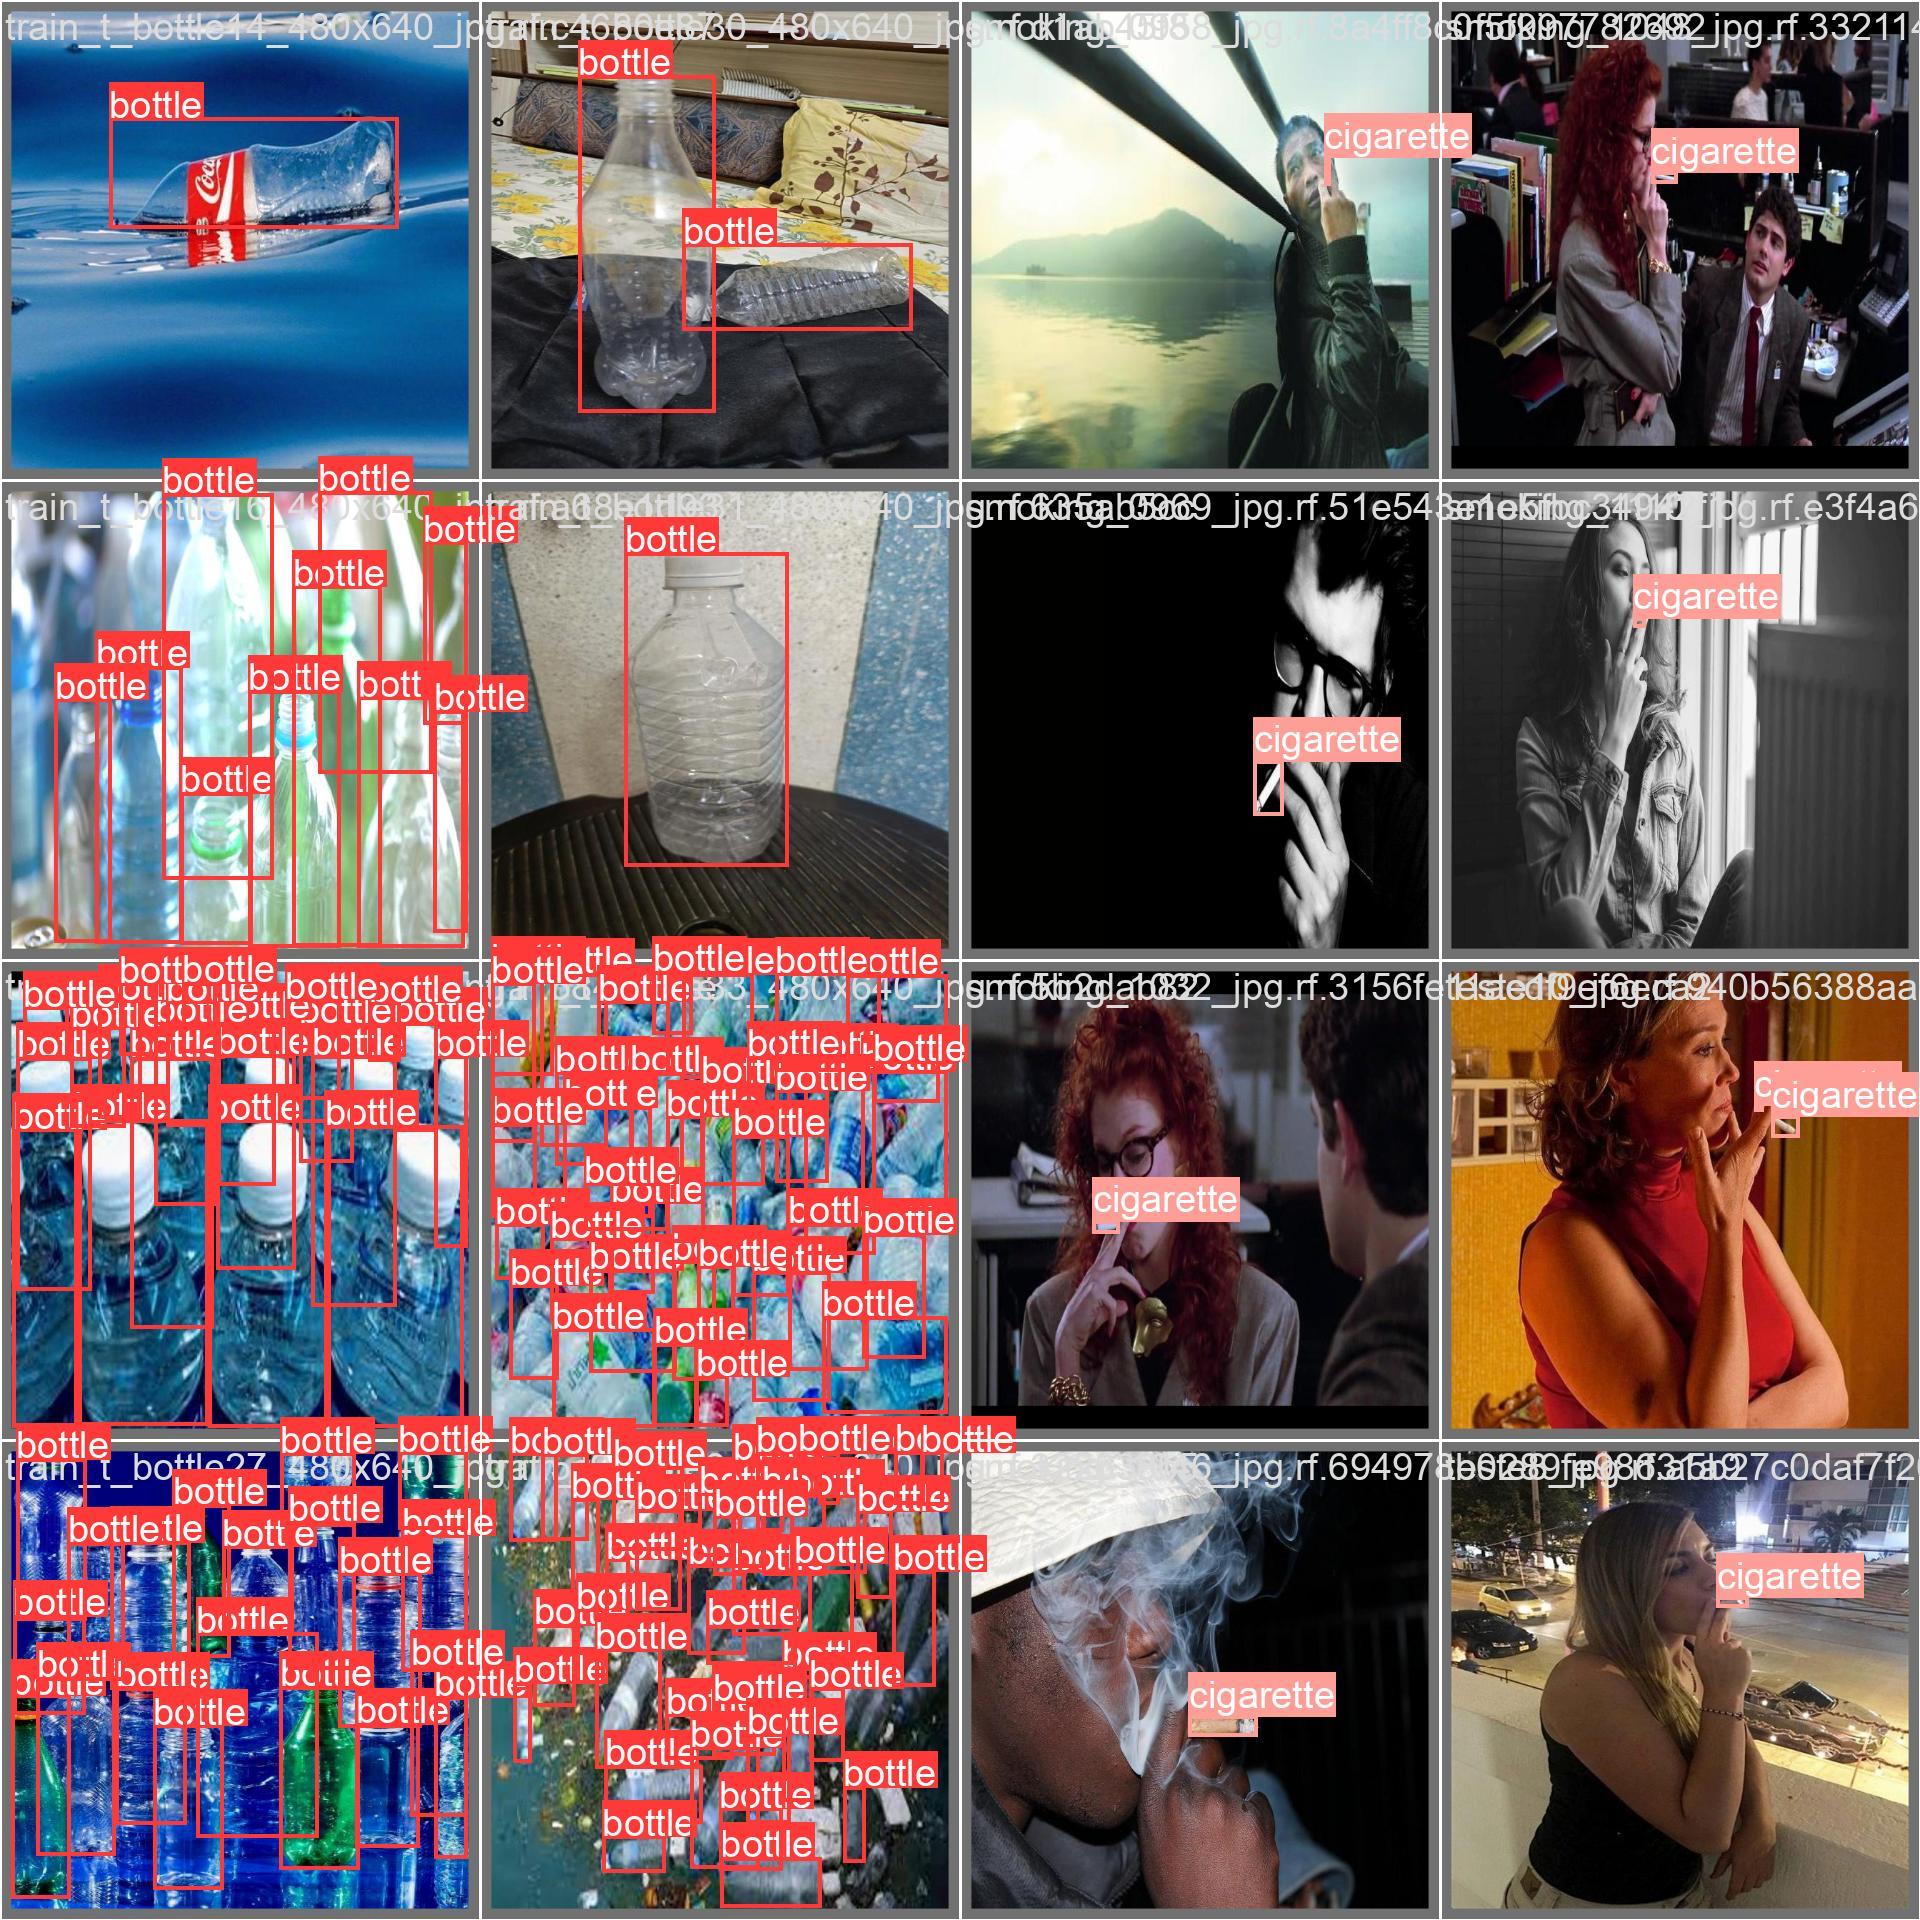

In [12]:
from IPython.display import Image, display

display(Image(filename='runs/train/exp5/results.png'))

display(Image(filename='runs/train/exp5/train_batch0.jpg'))
display(Image(filename='runs/train/exp5/val_batch0_labels.jpg'))

In [13]:
import shutil

# Salin file model ke direktori kerja
shutil.copy('runs/train/exp5/weights/best.pt', '/kaggle/working/best.pt')


'/kaggle/working/best.pt'

In [15]:
import os
from collections import Counter

# Path ke direktori label
labels_dir = '/kaggle/input/dmscoba/train/labels'

# Inisialisasi counter untuk kelas
class_counts = Counter()

# Baca semua file label
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            for line in f:
                # Ambil kelas dari baris (kelas adalah angka pertama pada setiap baris)
                class_id = line.split()[0]
                class_counts[class_id] += 1

# Tampilkan jumlah setiap kelas
for class_id, count in class_counts.items():
    print(f'Class {class_id}: {count} instances')

Class 0: 14902 instances
Class 4: 2379 instances
Class 3: 10374 instances
Class 2: 1527 instances
Class 1: 4045 instances


In [32]:
!python detect.py --source /kaggle/input/dmscoba/test/images --weights /kaggle/working/best.pt

detect: weights=['/kaggle/working/best.pt'], source=/kaggle/input/dmscoba/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/525 /kaggle/input/dmscoba/test/images/-105_jpg.rf.36fd0450f7f3d4b7abc807b6056cf1ff.jpg: 640x640 1 vape, 11.5ms
image 2/525 /kaggle/input/dmscoba/test/images/-109_jpg.rf.64c544ad0ab0325ddfad27bca488b386.jpg: 640x640 1 bottle, 11.6ms
image 3/525 /kaggle/input/dmscoba/test/images/-1114_png_jpg.rf.65fa613857c6dd3e76a276034

In [41]:
import os

# Path ke direktori hasil deteksi
result_dir = 'runs/detect/exp6'

# List semua file di direktori tersebut
files = os.listdir(result_dir)
print(files)



# Path ke direktori sumber
source_dir = 'runs/detect/exp6'

# Path ke direktori tujuan
destination_dir = '/kaggle/working/detection'

# Salin seluruh isi dari direktori sumber ke direktori tujuan
shutil.copytree(source_dir, destination_dir)


['-109_jpg.rf.64c544ad0ab0325ddfad27bca488b386.jpg', '500271_jpg.rf.a97c48947ad6a181fe2bbf1c3fa7c17b.jpg', 'train_t_bottle39_480x640_jpg.rf.c9448260001daacad8a603f0450398f2.jpg', 'FhiIAyuaUAEEL2k_jpg.rf.711f582bcbaf89eda9f8ffda70e5c231.jpg', '1312_jpg.rf.a3b5eec74d427e563b36b4084ab1a7a9.jpg', 'electronic-cigarette259_jpg.rf.544ac6a105fed6000061f02210864a5b.jpg', 'train_t_bottle18_480x640_jpg.rf.873314a653bee597ae6444abd6d632b9.jpg', '20220218_190556_jpg.rf.e435472e1ccaae875bb9f3afb22bedd9.jpg', 'bb0304_jpg.rf.4dda5f925439b37d309c40f12867009f.jpg', '800321_jpg.rf.e3d91f13615aa4593771d21f47d135e0.jpg', 'Android-phone_jpg.rf.1a1290197446ebc6f670d7d0743d42dd.jpg', 'three-plastic-water-bottles-tossed-on-the-ground-litter-and-trash-BMHD73-1-475x329_jpg.rf.3c65c566fdf8a0ce85c84cbba11a73cb.jpg', 'IMG20230325201508_01_jpg.rf.a57ba5e58eeffadff103a2155d67a709.jpg', '884d4c56cf4a717d4a800eb7baa1c0dc_jpg.rf.bf33808f17f162a0df0cbeb72db1cfa4.jpg', '-30_jpg.rf.b4f6fc1ccdb96162f4fafd370ee60490.jpg', '0

'/kaggle/working/detection'

In [42]:
import matplotlib.pyplot as plt
import os

# Path to the saved image
image_path = '/kaggle/working/detection/900060_jpg.rf.663091e4b1150dbac3bad58b34800e47.jpg'

# Load and display the image
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


UnidentifiedImageError: cannot identify image file '/kaggle/working/detection/900060_jpg.rf.663091e4b1150dbac3bad58b34800e47.jpg'